In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import sys

%pylab inline
import matplotlib.pyplot as plt

import numpy as np
from PIL import Image
import cv2
from itertools import product


Populating the interactive namespace from numpy and matplotlib


In [2]:
def intersection_over_union(target, prediction):
    # https://www.jeremyjordan.me/evaluating-image-segmentation-models/
    intersection = np.logical_and(target, prediction)
    union = np.logical_or(target, prediction)
    iou_score = np.sum(intersection) / np.sum(union)

    # return the intersection over union value
    return iou_score

In [39]:
# DAVIS query information
davis = ['17']
annot = ['annot1', 'annot2']

# image path
IMAGE_DIR = '../../../datasets/'
PRED_DIR = '../../data/'
frame = 0


 >> Annot:  annot1  >> Sequence:  aerobatics  >> IOU:  [0.0, 0.00017514668534897976, 0.37766544978002436]
 >> Annot:  annot1  >> Sequence:  bear  >> IOU:  [0.8870790595506245]
 >> Annot:  annot1  >> Sequence:  bike-packing  >> IOU:  [0.6214732787674531, 0.8473724231159175]
 >> Annot:  annot1  >> Sequence:  bike-trial  >> IOU:  [0.7893538532480259, 0.40622004741966405]
 >> Annot:  annot1  >> Sequence:  blackswan  >> IOU:  [0.8327777202608966]
 >> Annot:  annot1  >> Sequence:  bmx-bumps  >> IOU:  [0.26017375400091447, 0.7415658232489916]
 >> Annot:  annot1  >> Sequence:  bmx-trees  >> IOU:  [0.4037745219766576, 0.8229223248234655]
 >> Annot:  annot1  >> Sequence:  boat  >> IOU:  [0.6637322933990939]
 >> Annot:  annot1  >> Sequence:  boxing  >> IOU:  [0.8970199092741935, 0.8883037258292721, 0.7872971558192288]
 >> Annot:  annot1  >> Sequence:  boxing-fisheye  >> IOU:  [0.0, 0.8565621370499419, 0.86590943741424]
 >> Annot:  annot1  >> Sequence:  breakdance  >> IOU:  [0.747221996917836]
 >>

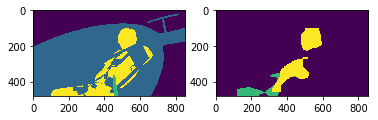

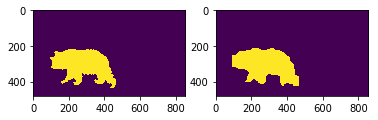

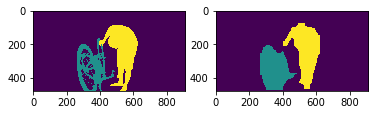

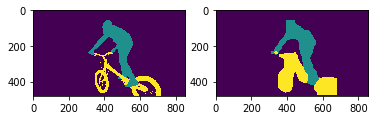

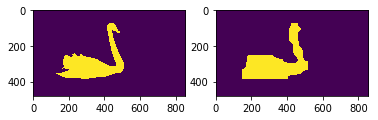

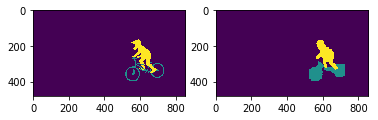

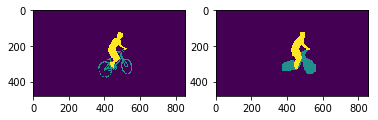

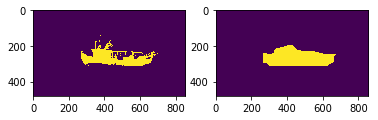

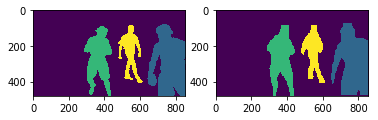

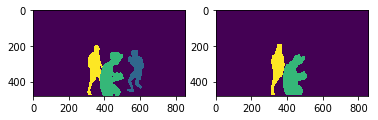

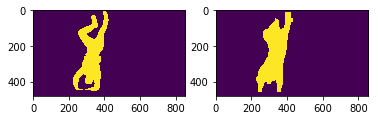

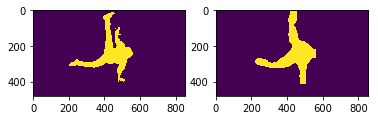

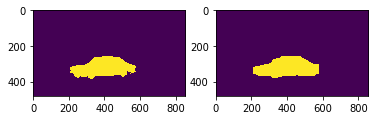

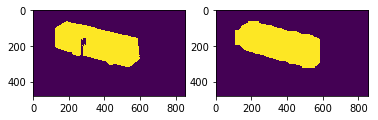

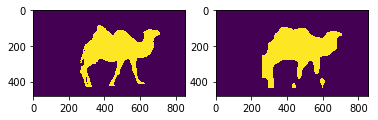

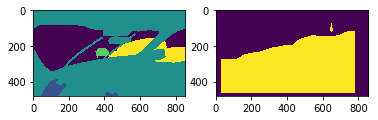

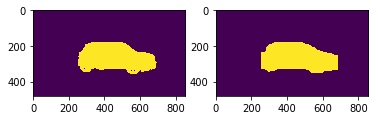

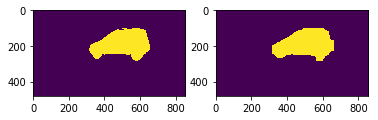

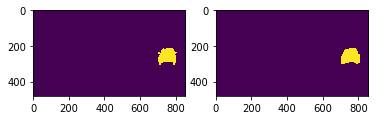

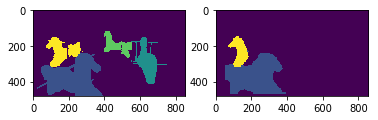

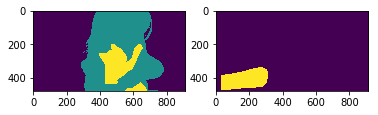

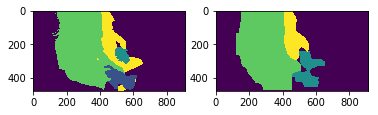

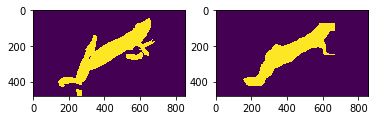

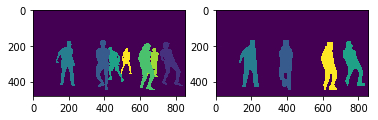

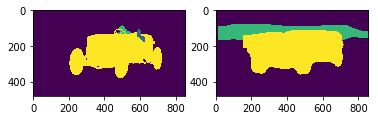

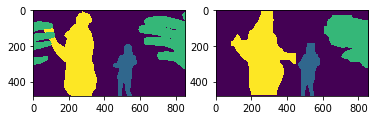

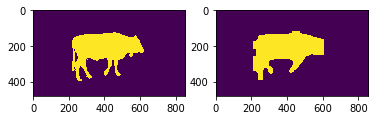

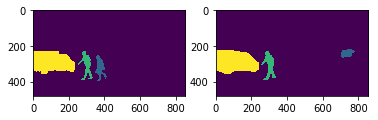

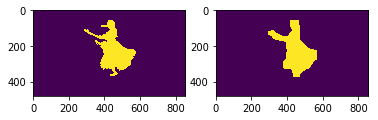

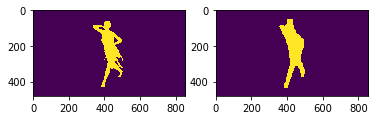

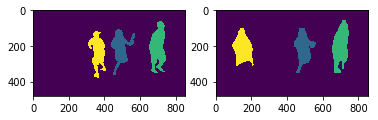

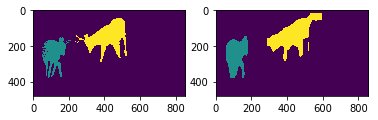

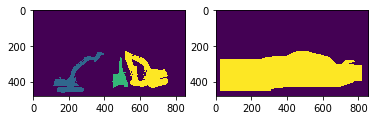

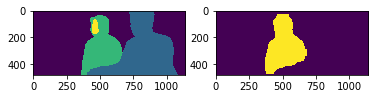

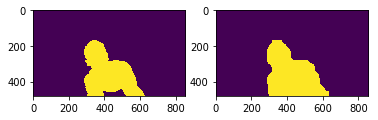

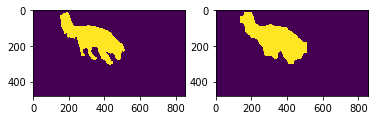

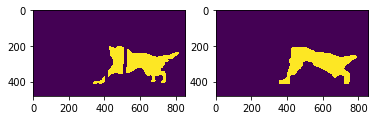

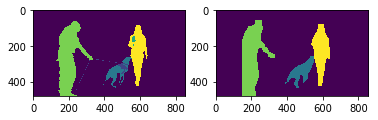

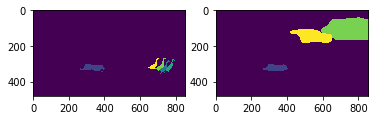

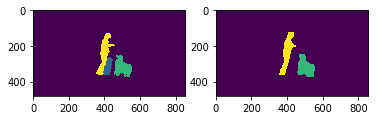

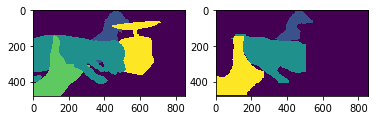

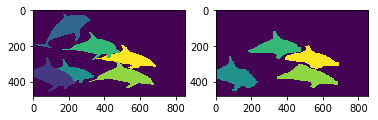

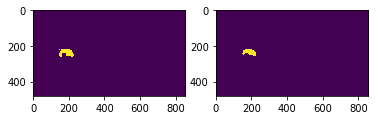

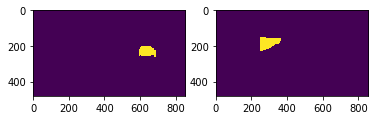

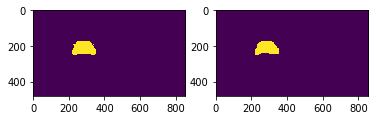

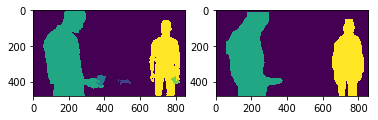

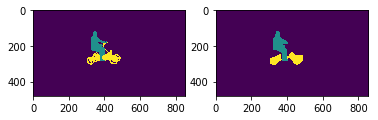

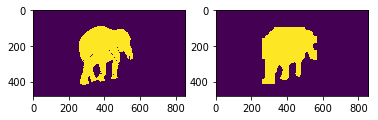

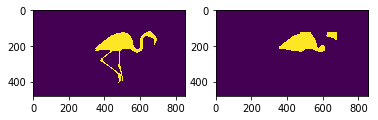

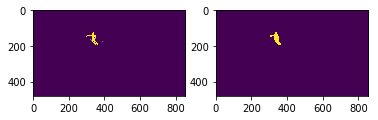

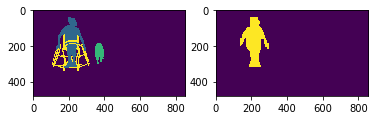

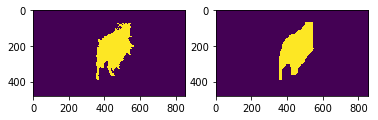

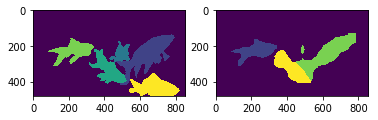

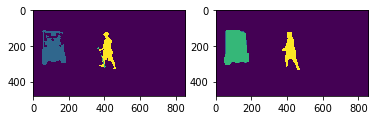

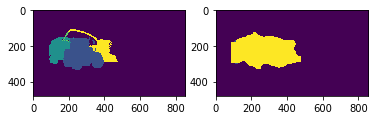

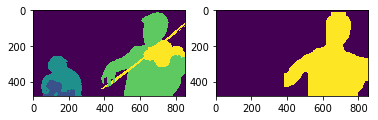

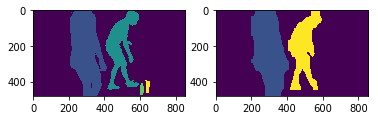

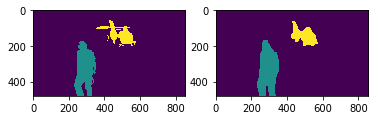

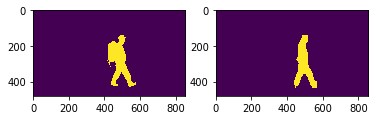

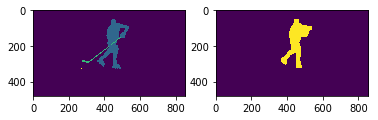

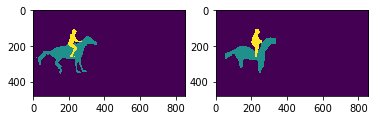

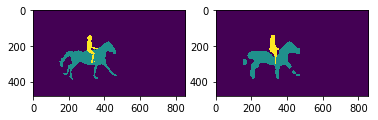

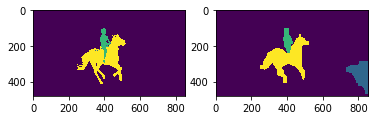

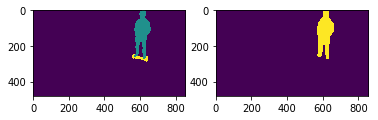

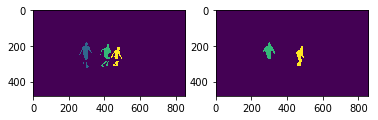

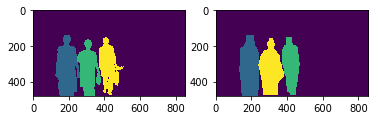

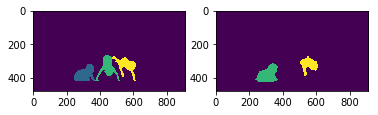

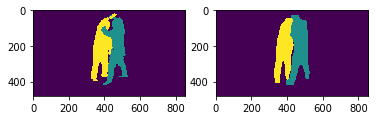

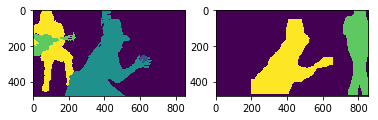

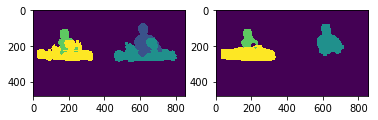

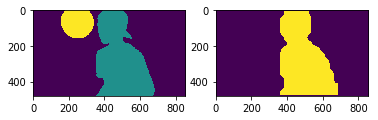

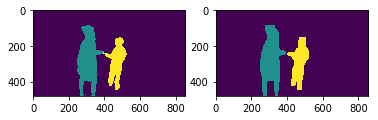

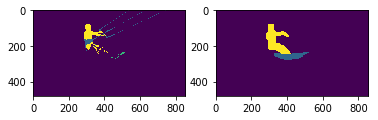

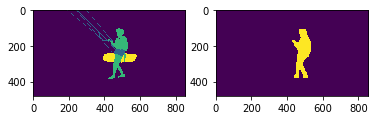

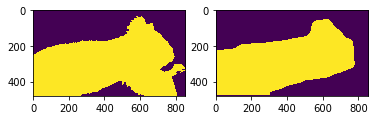

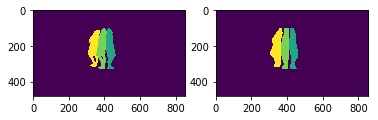

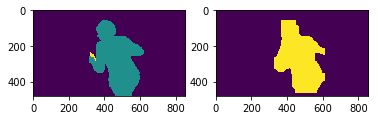

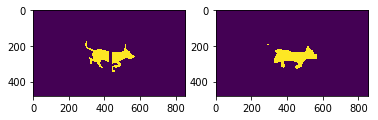

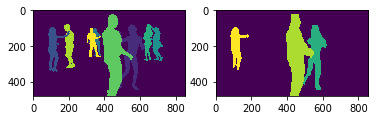

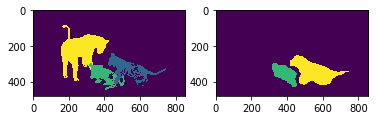

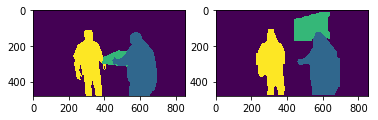

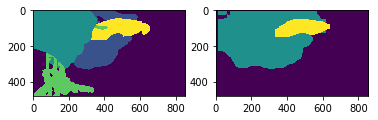

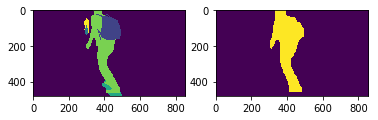

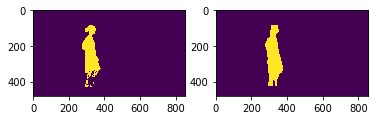

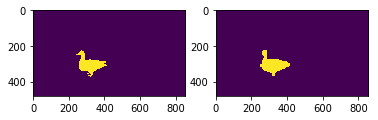

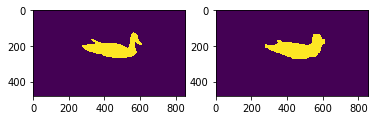

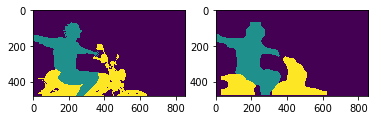

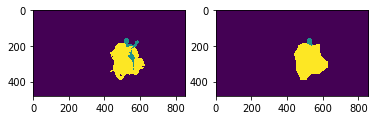

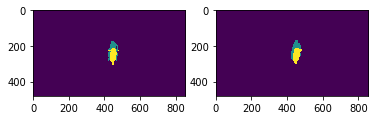

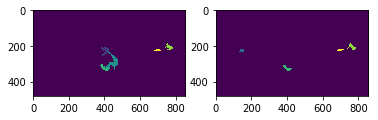

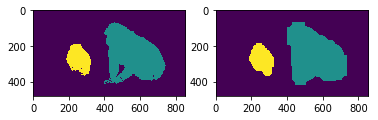

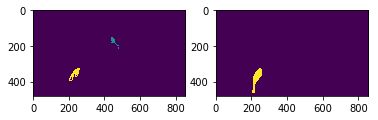

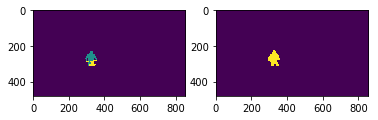

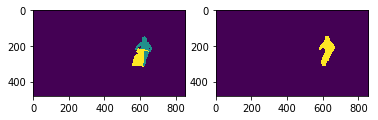

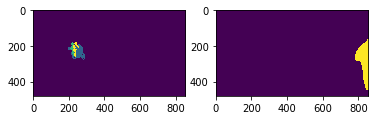

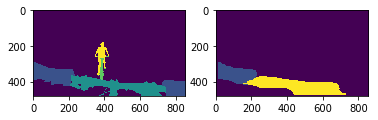

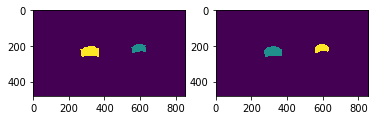

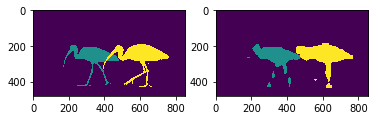

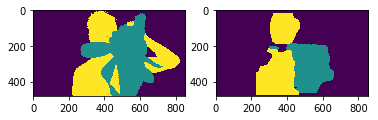

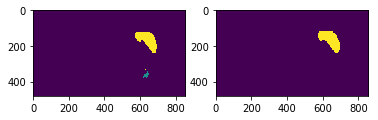

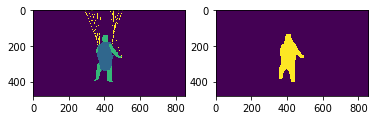

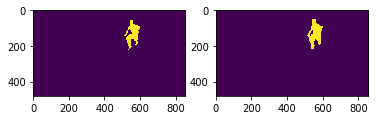

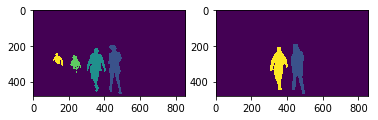

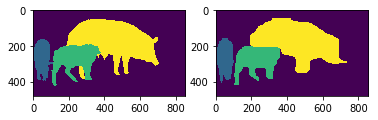

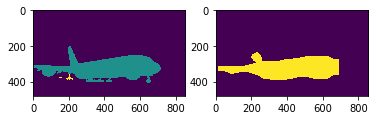

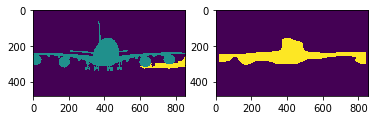

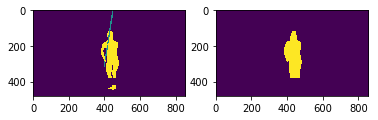

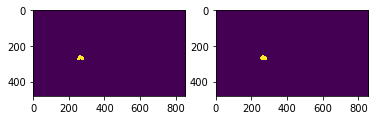

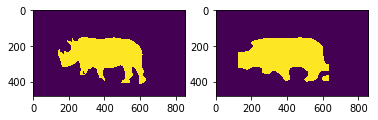

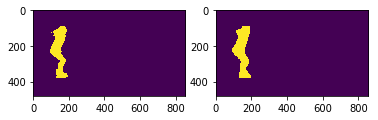

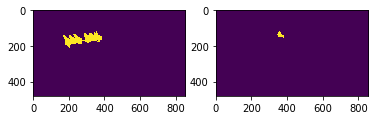

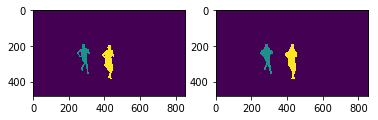

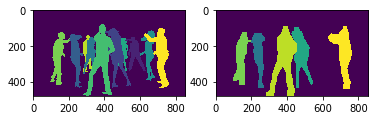

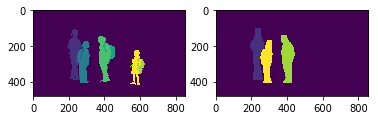

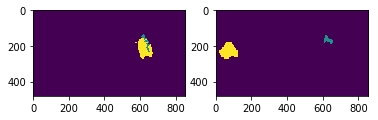

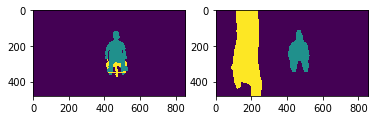

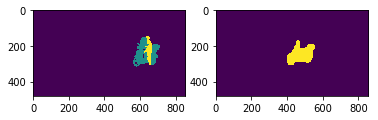

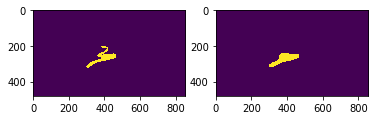

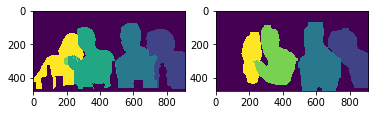

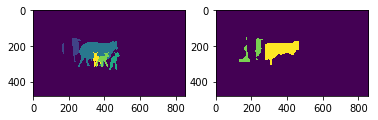

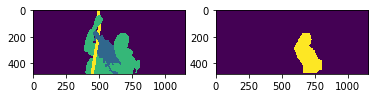

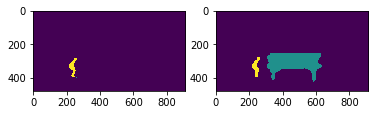

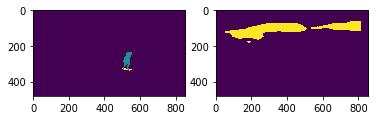

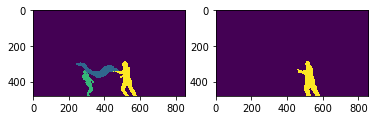

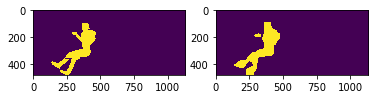

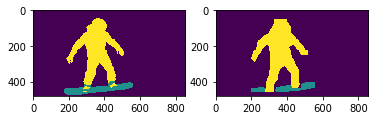

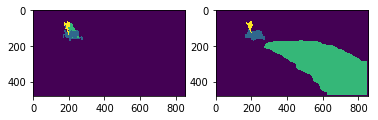

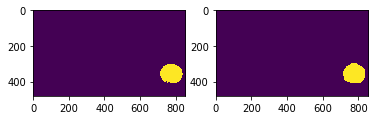

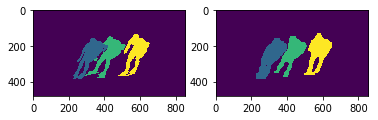

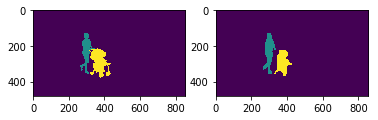

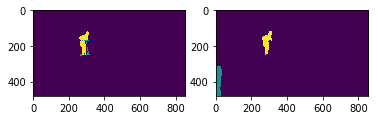

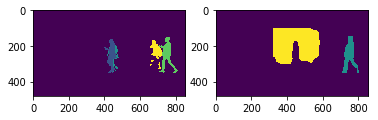

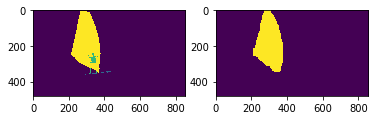

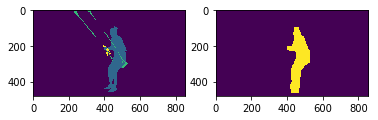

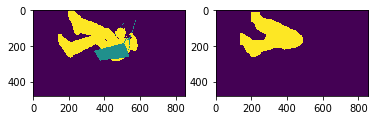

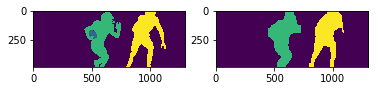

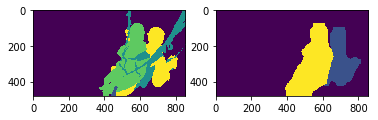

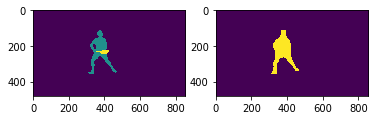

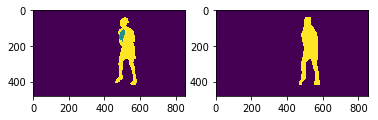

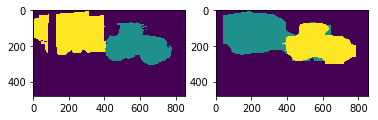

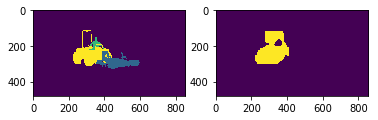

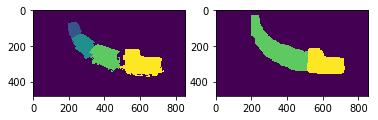

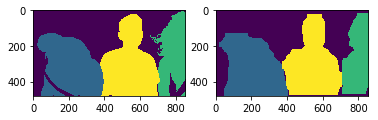

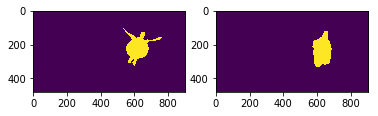

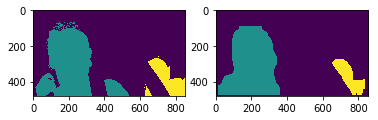

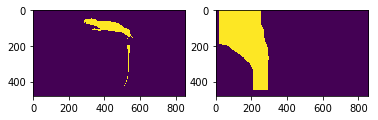

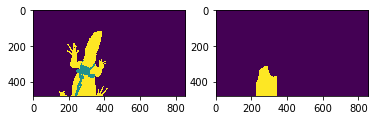

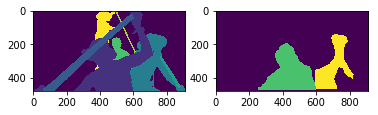

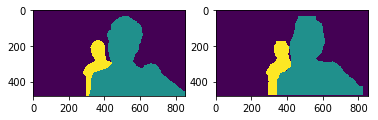

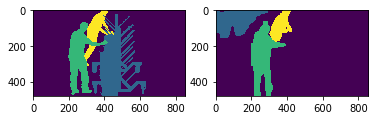

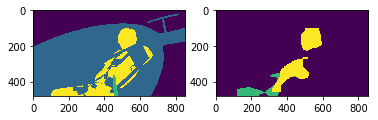

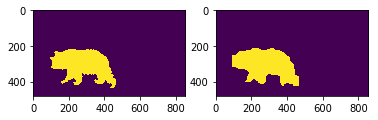

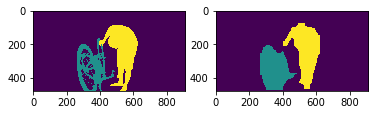

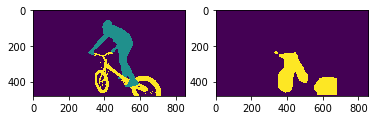

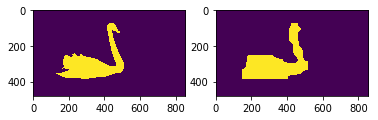

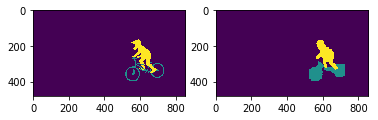

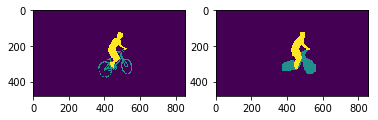

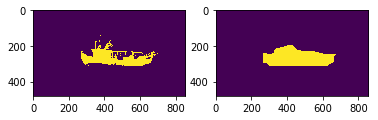

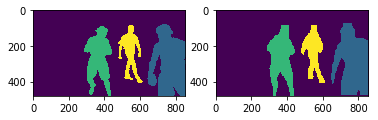

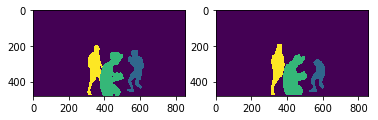

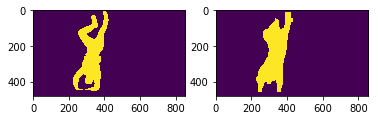

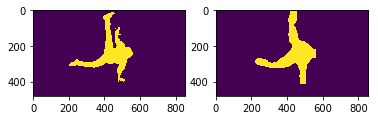

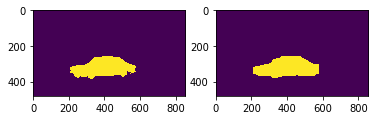

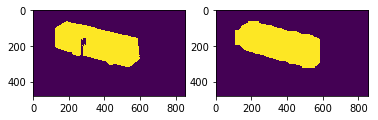

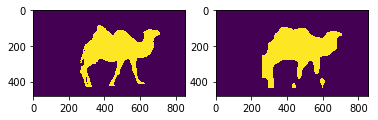

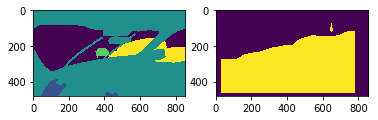

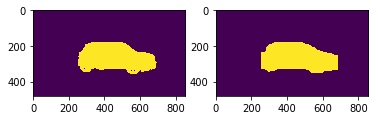

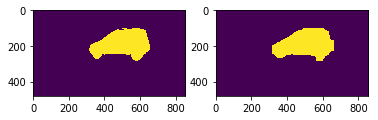

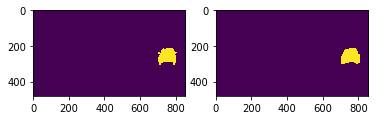

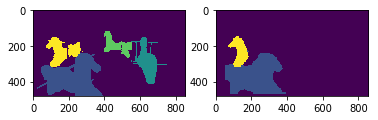

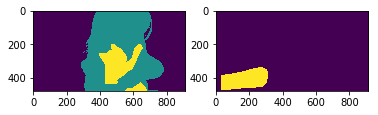

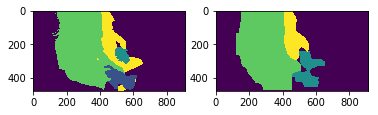

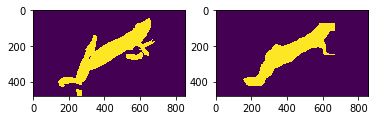

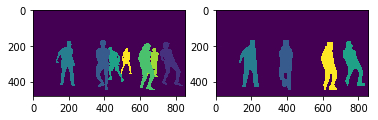

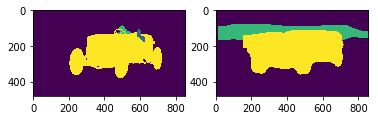

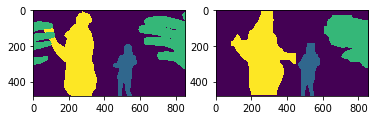

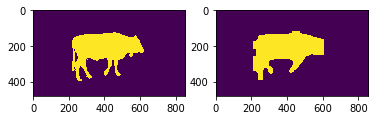

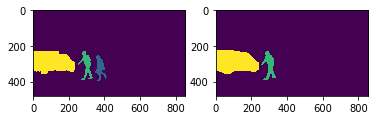

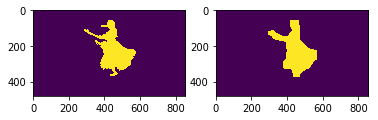

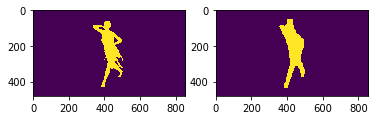

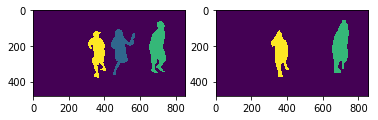

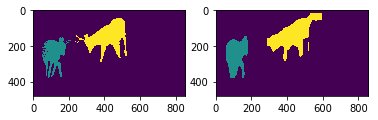

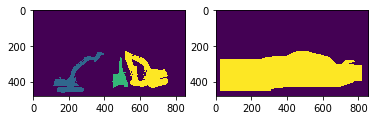

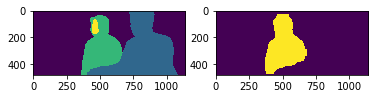

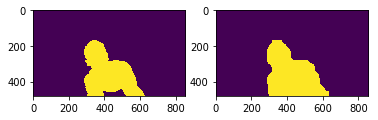

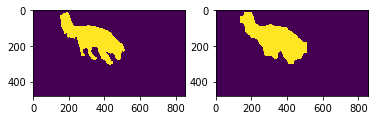

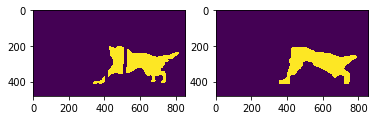

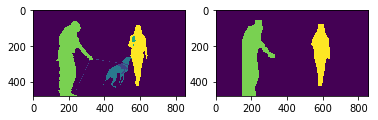

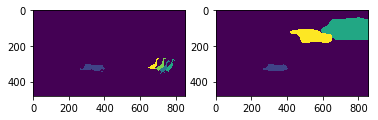

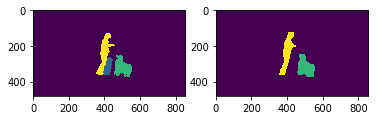

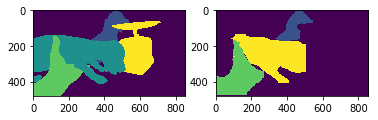

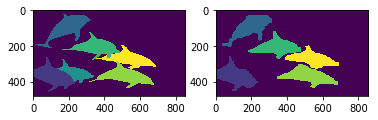

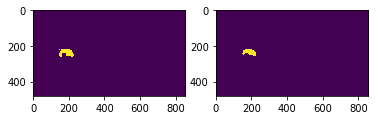

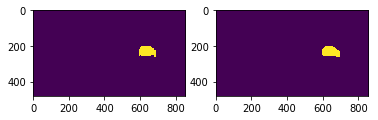

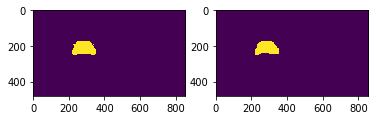

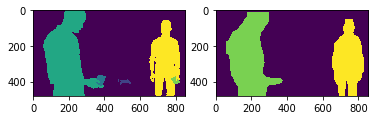

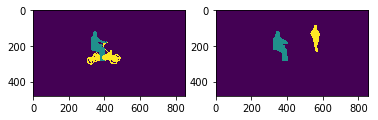

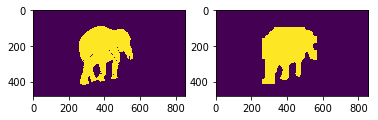

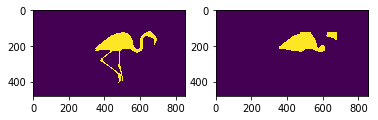

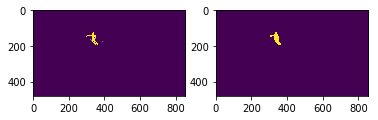

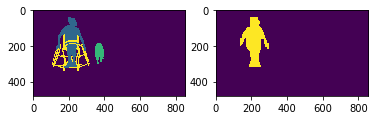

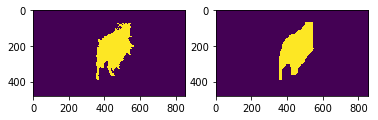

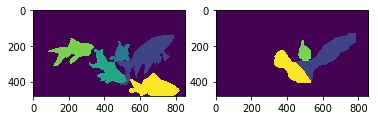

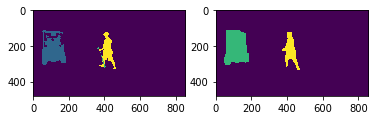

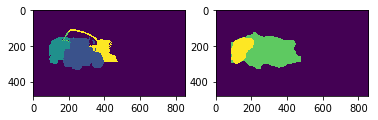

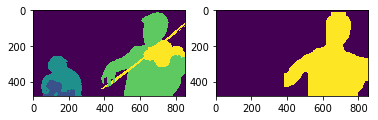

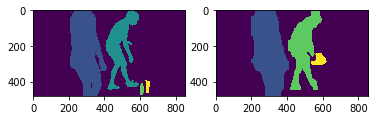

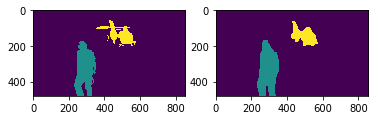

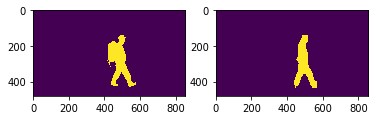

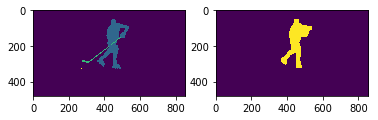

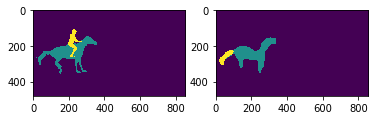

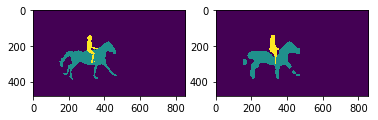

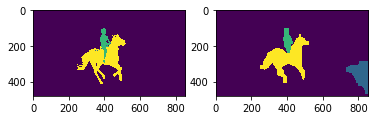

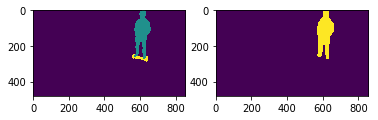

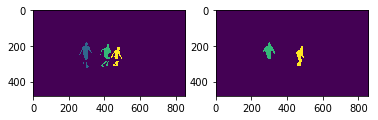

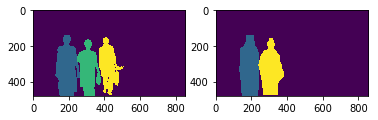

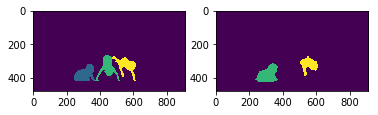

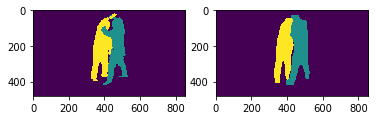

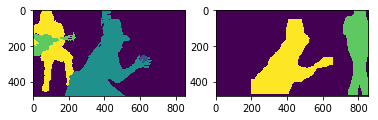

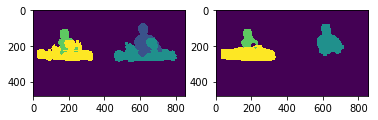

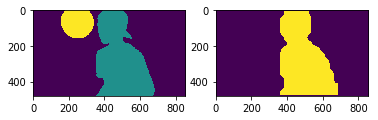

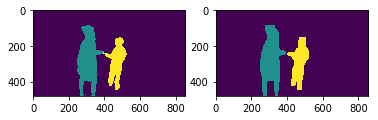

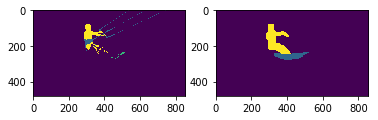

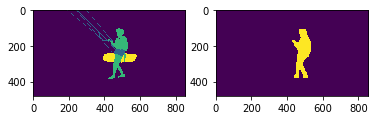

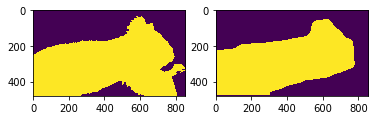

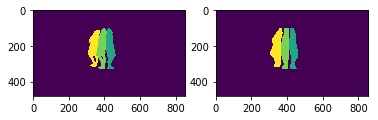

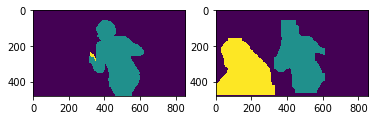

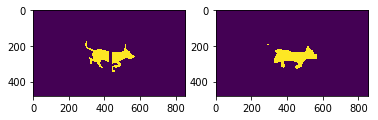

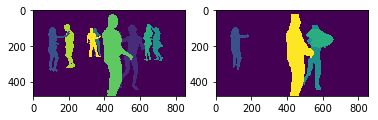

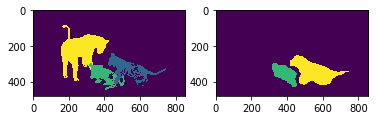

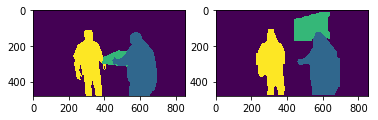

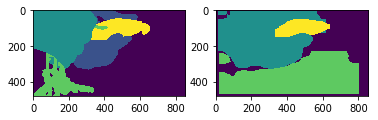

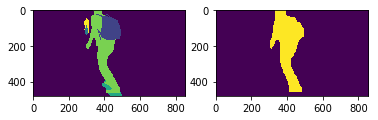

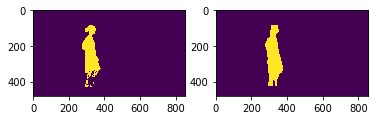

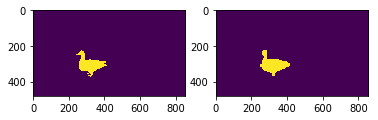

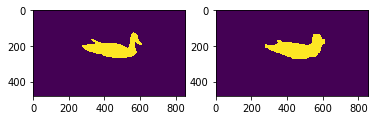

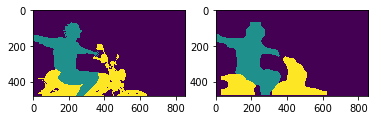

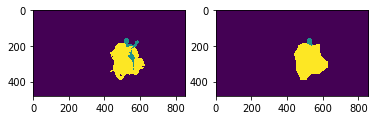

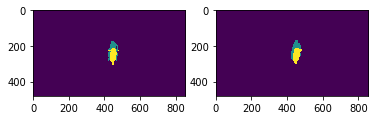

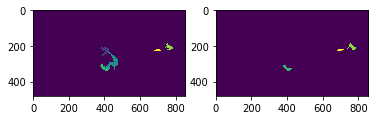

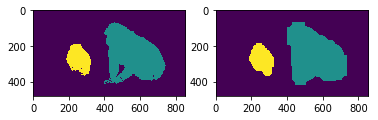

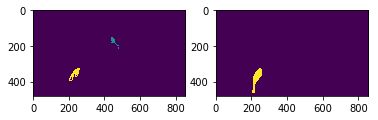

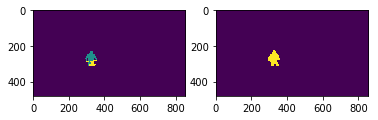

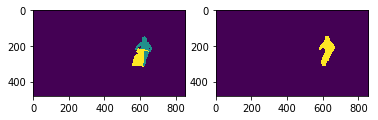

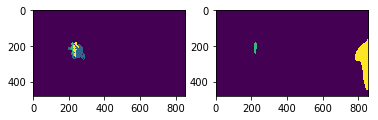

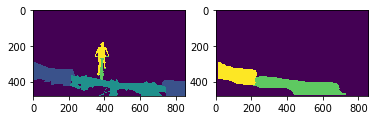

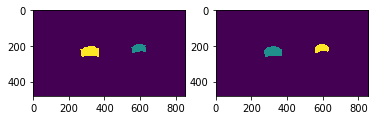

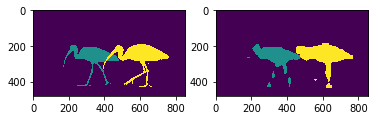

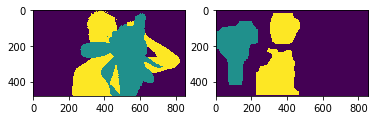

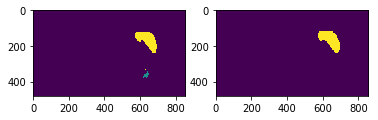

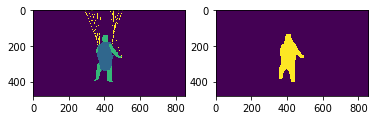

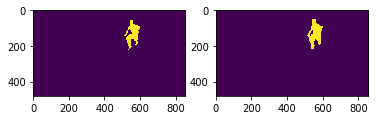

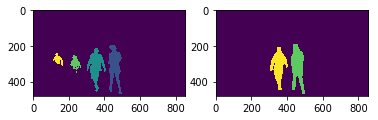

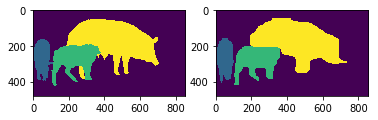

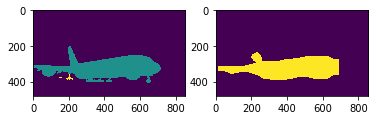

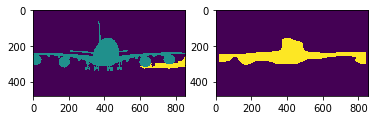

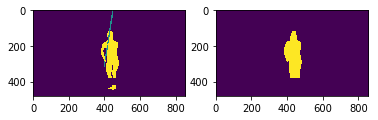

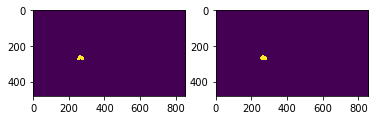

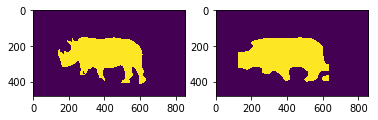

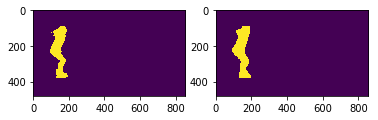

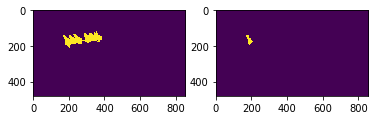

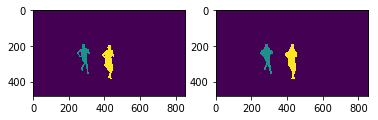

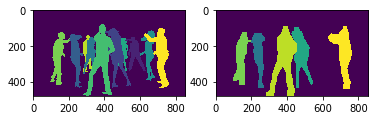

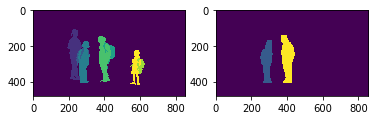

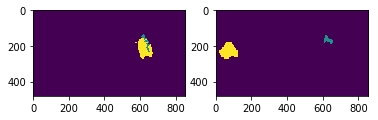

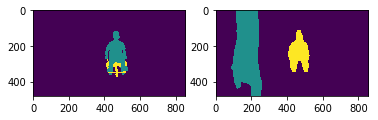

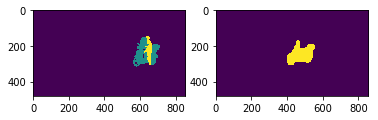

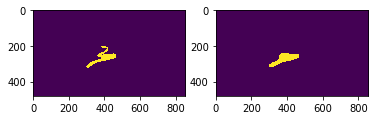

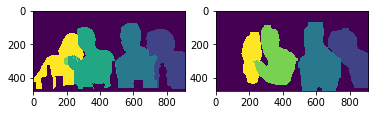

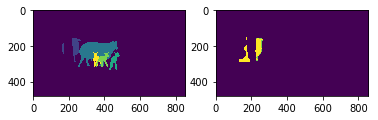

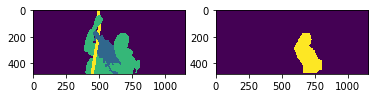

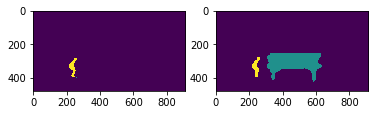

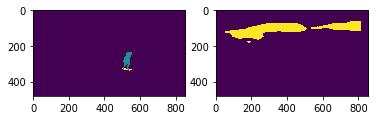

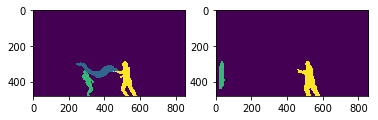

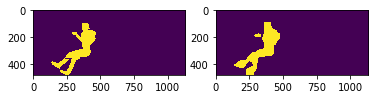

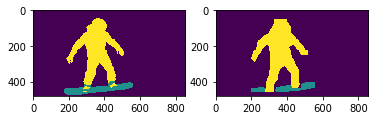

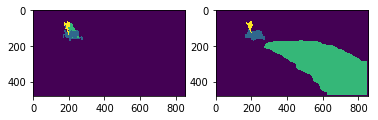

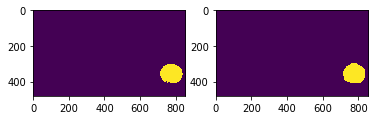

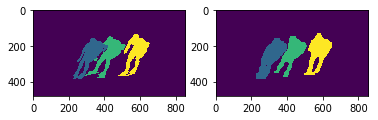

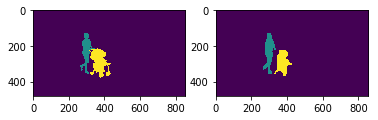

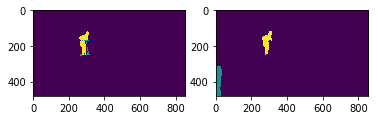

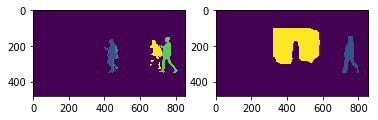

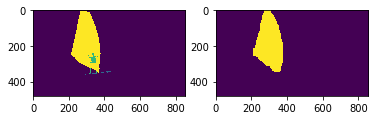

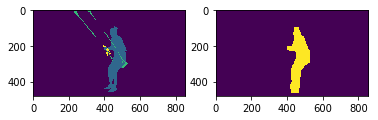

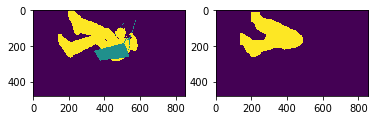

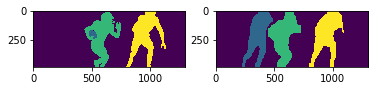

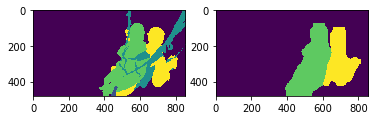

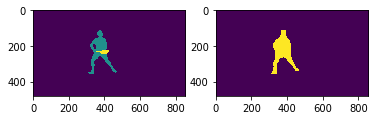

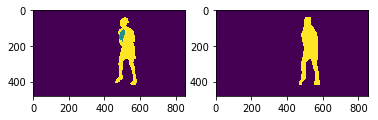

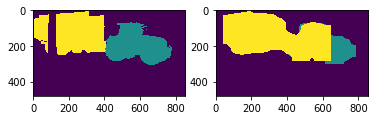

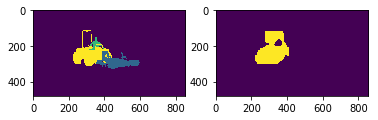

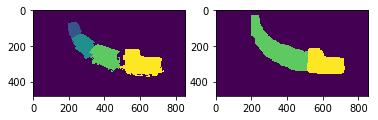

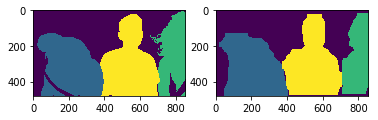

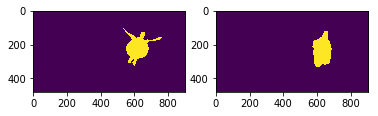

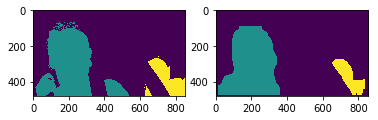

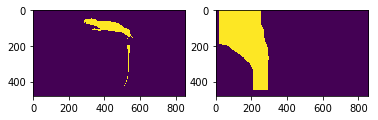

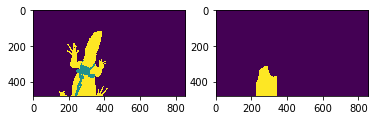

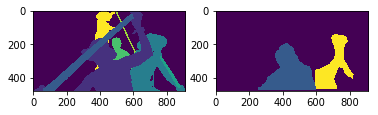

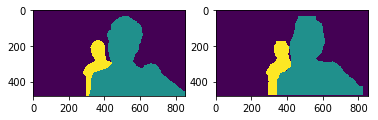

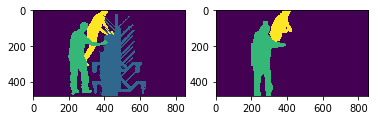

In [40]:
from IPython import embed
for d, a in product(davis, annot):
    
    img_path = os.path.join(IMAGE_DIR, 'DAVIS' + d,'JPEGImages/480p/') # davis_path
    gt_path = os.path.join(IMAGE_DIR, 'DAVIS' + d,'Annotations/480p/') # gt_path
    pred_path = os.path.join(PRED_DIR, 'DAVIS' + d + '_480p_masks', a) # pred_path
    seq = 'bear'
    for seq in sorted(os.listdir(pred_path)):
        # show mask
        fig = plt.figure()

        # READ ANNOTATIONS
        gt_img = os.path.join(gt_path, seq, '%05d.png' % frame)
        annot = np.array(Image.open(gt_img)) 

        plt.subplot(121)
        plt.imshow(annot)

        # READ PREDICTIONS
        pred_img = os.path.join(pred_path, seq, '%05d.png' % frame)
        pred = np.array(Image.open(pred_img))

        plt.subplot(122)
        plt.imshow(pred)

        # PROPOSALS VS GT
        k = np.unique(annot)[1:]
        iou_array = []
        for i in k:

            gt_mask = np.zeros(annot.shape)
            gt_mask[annot == i] = 1

            pred_mask = np.zeros(pred.shape)
            pred_mask[pred == i] = 1

            # iou
            iou = intersection_over_union(gt_mask, pred_mask)
            iou_array.append(iou)

        print(" >> Annot: ", a, " >> Sequence: ", seq, " >> IOU: ", iou_array)


In [ ]:
    
    # global_iou = []
    # for seq in os.listdir(pred_path):

                # iou_array.append(iou)
                
            # max_ind = np.argmax(iou_array)
            # global_iou.append(iou_array[max_ind])
            
        # print("----------- Statistics ----------")
        # y = np.array(global_iou)
        # print(" >> Score: ", np.mean(global_iou))